# Python script to read and plot 1d and 2d spectra released by "The Complete Calibration of the Color-Redshift Relation (C3R2) Survey (C3r2)" project.

## The spectra are available from the Keck Observatory Archive at
## https://koa.ipac.caltech.edu/Datasets/C3R2/


In [5]:
# Do set up
import numpy as np
from astropy.io import fits
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [6]:
# Open the FITS files for 1d and 2d spectra
# The files are assumed to be in same directory as the notebook
hdu1 = fits.open('spec1d.cos-m32.033.COSMOS-974310.fits')
hdu2 = fits.open('spec2d.cos-m32.033.COSMOS-974310.fits')

In [7]:
# read data and headers
data1d = hdu1[1].data
header1d = hdu1[1].header

data2d = hdu2[1].data
header2d = hdu2[1].header

# Set up variables to plot -- flux, wavelength, and inverse variance (1./sigma^2)
flux1d = data1d['flux'][0,:]
wave1d = data1d['lambda'][0,:]
ivar1d = data1d['ivar'][0,:]

flux2d = data2d['flux'][0,:,:]
wave2d = data2d['lambda'][0,:,:]
ivar2d = data2d['ivar'][0,:,:]


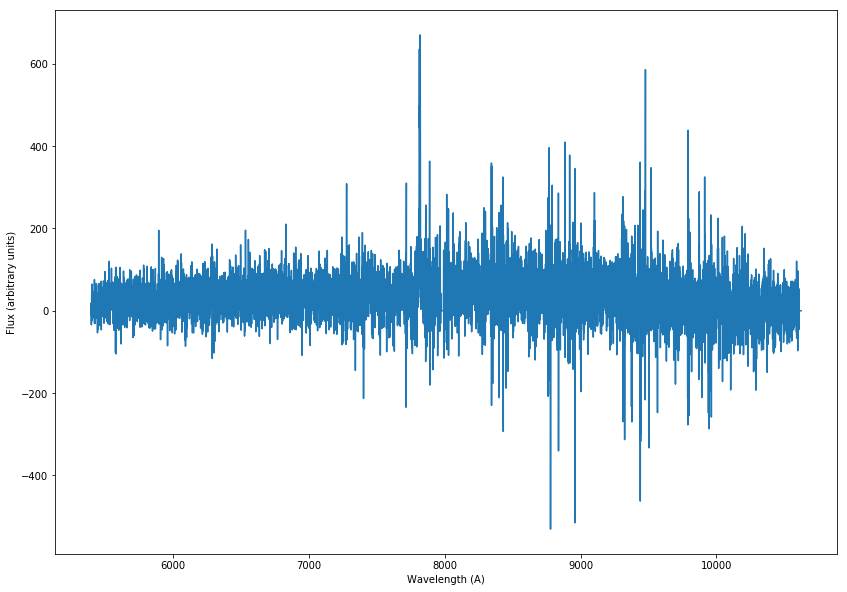

In [8]:
# Plot 1d spectrum

f=plt.figure(figsize=[14,10])
plt.plot(wave1d,flux1d)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux (arbitrary units)')
plt.show()


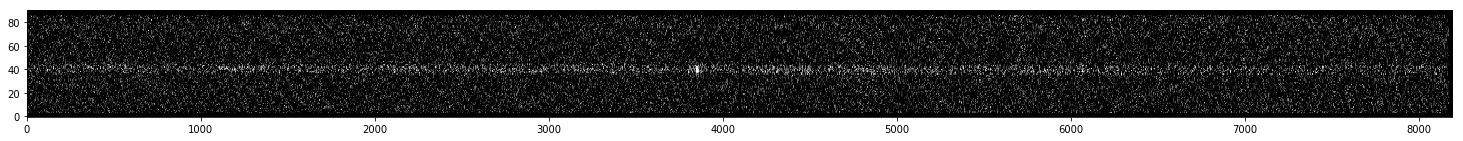

In [9]:
# Plot 2d spectrum

fig_2d = plt.figure(figsize=[20,1.5])
ax3 = fig_2d.add_axes([.0,.0,.99,.99])
pmap = ax3.imshow(flux2d*np.sqrt(ivar2d),origin='lower',interpolation='nearest',vmin=0.01,vmax=4,aspect="auto",cmap="Greys_r")
plt.show(fig_2d)